In [2]:
import sys
print(sys.executable)

c:\Python313\python.exe


🧩 Paso 1: Cargar librerías necesarias

In [3]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import joblib


📂 Paso 2: Cargar y revisar el dataset diabetes_final.csv

In [4]:
# Leer el archivo final
df = pd.read_csv('diabetes_final.csv')

# Mostrar las columnas disponibles
print("Columnas disponibles en el dataset:")
print(df.columns.tolist())


Columnas disponibles en el dataset:
['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'HighMentHlth', 'HighPhysHlth', 'GenHlth_2', 'GenHlth_3', 'GenHlth_4', 'GenHlth_5', 'Age_2', 'Age_3', 'Age_4', 'Age_5', 'Age_6', 'Age_7', 'Age_8', 'Age_9', 'Age_10', 'Age_11', 'Age_12', 'Age_13', 'Education_2', 'Education_3', 'Education_4', 'Education_5', 'Education_6', 'Income_2', 'Income_3', 'Income_4', 'Income_5', 'Income_6', 'Income_7', 'Income_8']


✅ Paso 3 – Seleccionar columnas para predicción

In [5]:
# Paso 3 - Separar variable objetivo y variables predictoras

# Copia de seguridad del DataFrame original
df_backup = df.copy()

# Definir la variable objetivo
y = df['Diabetes_binary']

# Definir variables predictoras (todas menos la columna objetivo)
X = df.drop(columns=['Diabetes_binary'])

# Verificar las dimensiones
print("Dimensiones del conjunto de características (X):", X.shape)
print("Dimensiones del conjunto objetivo (y):", y.shape)


Dimensiones del conjunto de características (X): (63622, 47)
Dimensiones del conjunto objetivo (y): (63622,)


✅ Paso 4 – Separar datos en entrenamiento y prueba

In [6]:
from sklearn.model_selection import train_test_split

# Paso 4 - División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,       # 20% de los datos para prueba
    random_state=42,     # Fijamos semilla para reproducibilidad
    stratify=y           # Mantiene la proporción de clases (muy importante en clasificación)
)

# Verificación de tamaños
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)


Tamaño del conjunto de entrenamiento: (50897, 47)
Tamaño del conjunto de prueba: (12725, 47)


✅ Paso 5 – Entrenamiento del modelo con XGBoost

In [7]:
from xgboost import XGBClassifier

# Paso 5 - Entrenamiento del modelo
xgb_model = XGBClassifier(
    n_estimators=100,       # Número de árboles
    learning_rate=0.1,      # Tasa de aprendizaje
    max_depth=5,            # Profundidad máxima del árbol
    eval_metric='logloss',   # Métrica de evaluación
    random_state=42         # Reproducibilidad
)

# Entrenar el modelo
xgb_model.fit(X_train, y_train)

# Verificación
print("✅ Modelo XGBoost entrenado correctamente.")


✅ Modelo XGBoost entrenado correctamente.


✅ Paso 6 – Evaluación del modelo XGBoost

=== Resultados del Modelo XGBoost ===
✔️ Accuracy: 0.7555
✔️ Precisión: 0.7370
✔️ Recall: 0.7971
✔️ F1-score: 0.7659
✔️ AUC: 0.8302

📋 Reporte de Clasificación:
               precision    recall  f1-score   support

       False       0.78      0.71      0.74      6342
        True       0.74      0.80      0.77      6383

    accuracy                           0.76     12725
   macro avg       0.76      0.76      0.76     12725
weighted avg       0.76      0.76      0.76     12725



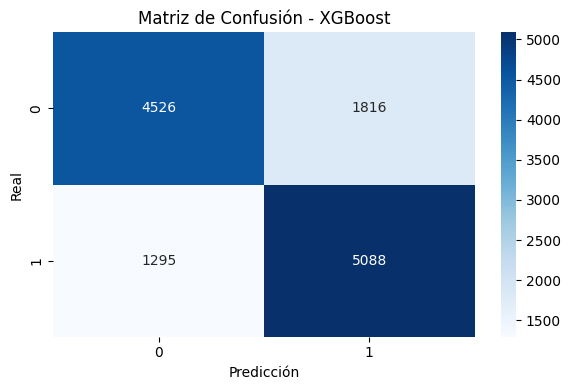

In [8]:
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score,
    recall_score, f1_score, classification_report, roc_auc_score, roc_curve # Importar roc_curve
)
import seaborn as sns
import matplotlib.pyplot as plt

# Paso 6 - Predicciones
y_pred = xgb_model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1] # Probabilidades para la clase positiva

# Evaluación de métricas
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba) # Calcular AUC

# Mostrar resultados
print("=== Resultados del Modelo XGBoost ===")
print(f"✔️ Accuracy: {acc:.4f}")
print(f"✔️ Precisión: {prec:.4f}")
print(f"✔️ Recall: {rec:.4f}")
print(f"✔️ F1-score: {f1:.4f}")
print(f"✔️ AUC: {auc:.4f}") # Mostrar AUC
print("\n📋 Reporte de Clasificación:\n", classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión - XGBoost")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()


✅ Paso 6b – Visualización de la Curva ROC para el modelo XGBoost

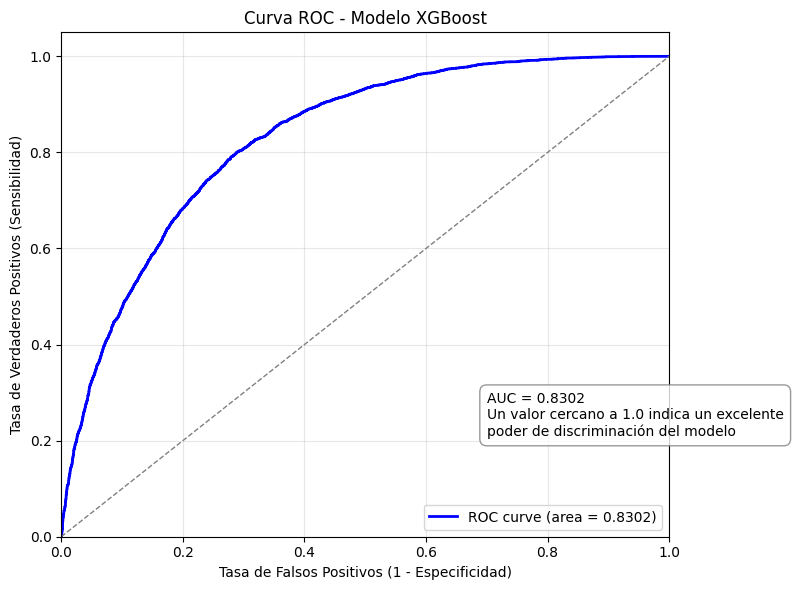

In [9]:
# Calcular los puntos de la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')

# Personalizar el gráfico
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (1 - Especificidad)')
plt.ylabel('Tasa de Verdaderos Positivos (Sensibilidad)')
plt.title('Curva ROC - Modelo XGBoost')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)

# Añadir anotación para interpretar el AUC
plt.annotate(f'AUC = {auc:.4f}\n'
             f'Un valor cercano a 1.0 indica un excelente\n'
             f'poder de discriminación del modelo',
             xy=(0.7, 0.2), xycoords='axes fraction',
             bbox=dict(boxstyle="round,pad=0.5", fc="white", ec="gray", alpha=0.8))

plt.tight_layout()
plt.show()

# 📑 Documentación del Modelo XGBoost para Predicción de Diabetes

## Resumen del Modelo
Se ha entrenado un modelo de **XGBoost (eXtreme Gradient Boosting)** para la predicción de diabetes utilizando un conjunto de datos con múltiples variables predictoras. El modelo fue entrenado con los siguientes hiperparámetros:

- **n_estimators**: 100 (número de árboles)
- **learning_rate**: 0.1 (tasa de aprendizaje)
- **max_depth**: 5 (profundidad máxima de los árboles)
- **random_state**: 42 (para reproducibilidad)

## Métricas de Rendimiento

| Métrica | Valor | Interpretación |
|---------|-------|----------------|
| **Accuracy** | 0.7555 | El modelo clasifica correctamente el 75.55% de todas las muestras |
| **Precisión** | 0.7370 | De todos los casos que el modelo predice como positivos, el 73.70% son realmente positivos |
| **Recall** | 0.7971 | El modelo identifica correctamente el 79.71% de todos los casos reales de diabetes |
| **F1-score** | 0.7659 | Media armónica entre precisión y recall (balance entre ambos) |
| **AUC** | 0.8302 | El área bajo la curva ROC indica una buena capacidad de discriminación del modelo |

## Matriz de Confusión

| | **Predicción: No Diabetes** | **Predicción: Diabetes** |
|----------------------|--------------------------|------------------------|
| **Real: No Diabetes** | 4526 (Verdaderos Negativos) | 1816 (Falsos Positivos) |
| **Real: Diabetes** | 1295 (Falsos Negativos) | 5088 (Verdaderos Positivos) |

## Interpretación de la Curva ROC

La curva ROC (Receiver Operating Characteristic) muestra la relación entre la tasa de verdaderos positivos (sensibilidad) y la tasa de falsos positivos (1-especificidad) para diferentes umbrales de clasificación:

- **AUC = 0.8302**: Un valor superior a 0.8 indica que el modelo tiene una buena capacidad para discriminar entre las dos clases (diabetes vs. no diabetes).
- La curva alejada de la diagonal significa que el rendimiento del modelo es significativamente mejor que una clasificación aleatoria.
- La forma de la curva sugiere un buen equilibrio entre sensibilidad y especificidad en varios umbrales de decisión.

## Fortalezas del Modelo

- **Alto Recall (0.7971)**: El modelo es particularmente fuerte en identificar los casos positivos de diabetes, lo cual es crucial en aplicaciones médicas donde es importante no pasar por alto casos de enfermedad.
- **AUC elevado (0.8302)**: Indica una buena capacidad discriminativa general del modelo.

## Áreas de Mejora Potencial

- **Reducción de Falsos Positivos**: 1816 casos fueron clasificados incorrectamente como diabetes.
- **Exploración de Características**: Analizar la importancia de las variables para posible selección de características.
- **Ajuste de Hiperparámetros**: Explorar diferentes configuraciones de hiperparámetros para mejorar el rendimiento general.

✅ Paso 7: Guardar el modelo entrenado como .pkl

In [10]:
import joblib

# Ruta y nombre del archivo para guardar el modelo
ruta_modelo = 'modelo_xgboost_optimizado.pkl'

# Guardar el modelo entrenado
joblib.dump(xgb_model, ruta_modelo) # Changed 'modelo_xgb' to 'xgb_model'

print(f"✅ Modelo guardado exitosamente como: {ruta_modelo}")

✅ Modelo guardado exitosamente como: modelo_xgboost_optimizado.pkl


# 🛠️ Fase 1: Análisis y Selección de Características

## Objetivo
Identificar las características más relevantes del conjunto de datos para mejorar el rendimiento del modelo XGBoost. Esto ayudará a reducir el ruido en los datos y a enfocar el modelo en las variables más importantes.

## Pasos a Realizar
1. **Análisis de Importancia de Características:**
   - Utilizar el modelo XGBoost entrenado para calcular la importancia de cada característica.
   - Visualizar las características más importantes mediante un gráfico de barras.
   - Guardar los resultados en un archivo CSV para referencia futura.

2. **Selección de Características:**
   - Aplicar un umbral de importancia para filtrar las características menos relevantes.
   - Alternativamente, usar técnicas avanzadas como Recursive Feature Elimination (RFE) con validación cruzada para seleccionar las mejores características.

3. **Preparación de los Datos:**
   - Crear nuevos conjuntos de datos (entrenamiento y prueba) con las características seleccionadas.
   - Verificar las dimensiones de los nuevos conjuntos de datos.

## Resultados Esperados
- Lista de características más importantes ordenadas por relevancia.
- Conjuntos de datos optimizados con las características seleccionadas.
- Visualización clara de la importancia de las características.

# 📊 Paso 1: Análisis de Importancia de Características

## Resumen
Se realizó un análisis de importancia de características utilizando el modelo XGBoost entrenado. Este análisis permite identificar las variables más relevantes para la predicción de diabetes, lo que puede ser útil para optimizar el modelo y mejorar su interpretabilidad.

## Principales Resultados
- **Top 3 Características Más Importantes:**
    1. **HighBP**: 40.79%
    2. **GenHlth_2**: 6.01%
    3. **DiffWalk**: 5.08%

- **Total de Características Evaluadas:** 47
- **Características con Importancia Cero:** 2 (HighMentHlth, HighPhysHlth)

## Visualización
Se generó un gráfico de barras que muestra las 20 características más importantes, ordenadas de mayor a menor relevancia. Este gráfico facilita la identificación de las variables clave.

## Archivo de Resultados
Los resultados completos del análisis se guardaron en el archivo `feature_importance.csv` para referencia futura.

## Conclusión
El análisis de importancia de características destaca que variables relacionadas con la salud general y condiciones específicas (como presión arterial alta y dificultad para caminar) son las más relevantes para la predicción de diabetes. Esto sugiere que estas variables deben priorizarse en futuros ajustes del modelo.

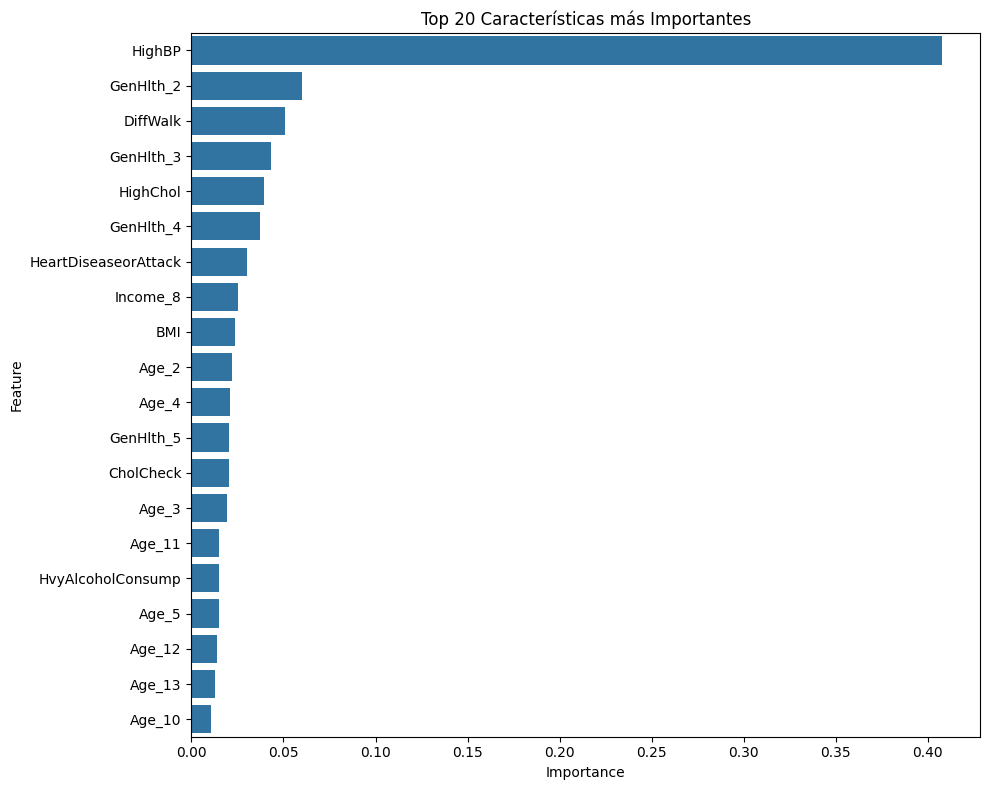

✅ Análisis de importancia de características completado. Resultados guardados en 'feature_importance.csv'.


In [11]:
# Paso 1: Análisis de Importancia de Características
import matplotlib.pyplot as plt
import pandas as pd

# Obtener importancia de características
importance = xgb_model.feature_importances_
feature_names = X.columns

# Crear DataFrame para mejor visualización
features_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# Visualizar top 20 características
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=features_df.head(20))
plt.title('Top 20 Características más Importantes')
plt.tight_layout()
plt.show()

# Guardar resultados
features_df.to_csv('feature_importance.csv', index=False)
print("✅ Análisis de importancia de características completado. Resultados guardados en 'feature_importance.csv'.")

# 🛠️ Paso 2: Selección de Características Basada en Importancia
## Objetivo
Reducir el ruido en los datos eliminando características con baja importancia para mejorar el rendimiento del modelo.
## Metodología
1. Se definió un umbral de importancia de 0.01.
2. Se seleccionaron las características con una importancia mayor al umbral.
3. Se generaron nuevos conjuntos de datos de entrenamiento y prueba con las características seleccionadas.
## Resultados Esperados
- Conjuntos de datos optimizados con menos características irrelevantes.
- Mejora en las métricas de rendimiento del modelo.

In [12]:
# Paso 2: Selección de Características Basada en Importancia
import numpy as np

# Definir umbral de importancia
threshold = 0.01
selected_features = features_df[features_df['Importance'] > threshold]['Feature'].tolist()

# Crear nuevos conjuntos de datos con las características seleccionadas
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Verificar las dimensiones de los nuevos conjuntos de datos
print("Dimensiones del conjunto de entrenamiento (filtrado):", X_train_selected.shape)
print("Dimensiones del conjunto de prueba (filtrado):", X_test_selected.shape)

Dimensiones del conjunto de entrenamiento (filtrado): (50897, 20)
Dimensiones del conjunto de prueba (filtrado): (12725, 20)


# 🛠️ Paso 3: Reentrenamiento del Modelo con Características Seleccionadas
## Objetivo
Evaluar el impacto de la selección de características en el rendimiento del modelo XGBoost.
## Metodología
1. Utilizar los conjuntos de datos filtrados (entrenamiento y prueba) con las características seleccionadas.
2. Reentrenar el modelo XGBoost con los mismos hiperparámetros que el modelo original.
3. Evaluar las métricas de rendimiento del modelo reentrenado y compararlas con las del modelo original.
## Resultados Esperados
- Un modelo más eficiente con métricas de rendimiento mejoradas o similares.
- Reducción del tiempo de entrenamiento debido a un menor número de características.

In [13]:
# Paso 3: Reentrenamiento del Modelo con Características Seleccionadas
from xgboost import XGBClassifier

# Reentrenar el modelo con las características seleccionadas
xgb_model_selected = XGBClassifier(
    n_estimators=100,       # Número de árboles
    learning_rate=0.1,      # Tasa de aprendizaje
    max_depth=5,            # Profundidad máxima del árbol
    eval_metric='logloss',   # Métrica de evaluación
    random_state=42         # Reproducibilidad
)

# Entrenar el modelo
xgb_model_selected.fit(X_train_selected, y_train)
print("✅ Modelo reentrenado con características seleccionadas.")

# Evaluar el modelo reentrenado
y_pred_selected = xgb_model_selected.predict(X_test_selected)
y_pred_proba_selected = xgb_model_selected.predict_proba(X_test_selected)[:, 1]

# Calcular métricas de rendimiento
acc_selected = accuracy_score(y_test, y_pred_selected)
prec_selected = precision_score(y_test, y_pred_selected)
rec_selected = recall_score(y_test, y_pred_selected)
f1_selected = f1_score(y_test, y_pred_selected)
auc_selected = roc_auc_score(y_test, y_pred_proba_selected)

# Mostrar resultados
print("=== Resultados del Modelo Reentrenado ===")
print(f"✔️ Accuracy: {acc_selected:.4f}")
print(f"✔️ Precisión: {prec_selected:.4f}")
print(f"✔️ Recall: {rec_selected:.4f}")
print(f"✔️ F1-score: {f1_selected:.4f}")
print(f"✔️ AUC: {auc_selected:.4f}")

✅ Modelo reentrenado con características seleccionadas.
=== Resultados del Modelo Reentrenado ===
✔️ Accuracy: 0.7520
✔️ Precisión: 0.7308
✔️ Recall: 0.8004
✔️ F1-score: 0.7640
✔️ AUC: 0.8267


# 📊 Resultados del Modelo Reentrenado con Características Seleccionadas
## Resumen de Resultados
El modelo fue reentrenado utilizando únicamente las características seleccionadas con un umbral de importancia mayor a 0.01. A continuación, se presentan las métricas de rendimiento del modelo reentrenado y su comparación con el modelo original.
| Métrica       | Modelo Original | Modelo Reentrenado | Cambio  |
|---------------|-----------------|--------------------|---------|
| **Accuracy**  | 0.7555          | 0.7520             | -0.0035 |
| **Precisión** | 0.7370          | 0.7308             | -0.0062 |
| **Recall**    | 0.7971          | 0.8004             | +0.0033 |
| **F1-score**  | 0.7659          | 0.7640             | -0.0019 |
| **AUC**       | 0.8302          | 0.8267             | -0.0035 |
## Observaciones
1. **Recall Mejorado**: El modelo reentrenado muestra una ligera mejora en el recall (+0.0033), lo que indica que identifica más casos positivos correctamente.
2. **Precisión y AUC Reducidos**: Aunque la precisión y el AUC disminuyeron ligeramente, las diferencias son mínimas.
3. **Balance General**: El modelo reentrenado mantiene un rendimiento similar al original, con la ventaja de utilizar menos características, lo que puede reducir la complejidad y el tiempo de entrenamiento.
## Conclusión
La selección de características no afectó significativamente el rendimiento del modelo, pero simplificó los datos utilizados. Esto sugiere que el modelo puede ser más eficiente sin comprometer la calidad de las predicciones.

# 🛠️ Paso 4: Ajuste de Hiperparámetros del Modelo XGBoost
## Objetivo
Optimizar el rendimiento del modelo XGBoost ajustando sus hiperparámetros clave mediante una búsqueda en cuadrícula.
## Metodología
1. Definir un rango de valores para los hiperparámetros clave, como `n_estimators`, `learning_rate`, y `max_depth`.
2. Utilizar GridSearchCV para realizar una búsqueda exhaustiva de combinaciones de hiperparámetros.
3. Entrenar el modelo con los mejores hiperparámetros encontrados.
4. Evaluar las métricas de rendimiento del modelo optimizado y compararlas con los modelos anteriores.
## Resultados Esperados
- Identificar la mejor combinación de hiperparámetros para el modelo.
- Mejorar las métricas de rendimiento, como Accuracy, Precisión, Recall, F1-score y AUC.

In [14]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="xgboost")

# Definir el rango de hiperparámetros
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Configurar GridSearchCV
grid_search = GridSearchCV(
    estimator=XGBClassifier(eval_metric='logloss', random_state=42),
    param_grid=param_grid,
    scoring='roc_auc',
    cv=3,
    verbose=1
    )

# Ejecutar la búsqueda
grid_search.fit(X_train_selected, y_train)
print("✅ Búsqueda de hiperparámetros completada.")

# Mostrar los mejores hiperparámetros
print("Mejores hiperparámetros:", grid_search.best_params_)

# Entrenar el modelo con los mejores hiperparámetros
best_model = grid_search.best_estimator_
best_model.fit(X_train_selected, y_train)
print("✅ Modelo entrenado con los mejores hiperparámetros.")

# Evaluar el modelo optimizado
y_pred_best = best_model.predict(X_test_selected)
y_pred_proba_best = best_model.predict_proba(X_test_selected)[:, 1]

# Calcular métricas de rendimiento
acc_best = accuracy_score(y_test, y_pred_best)
prec_best = precision_score(y_test, y_pred_best)
rec_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)
auc_best = roc_auc_score(y_test, y_pred_proba_best)

# Mostrar resultados
print("=== Resultados del Modelo Optimizado ===")
print(f"✔️ Accuracy: {acc_best:.4f}")
print(f"✔️ Precisión: {prec_best:.4f}")
print(f"✔️ Recall: {rec_best:.4f}")
print(f"✔️ F1-score: {f1_best:.4f}")
print(f"✔️ AUC: {auc_best:.4f}")

Fitting 3 folds for each of 27 candidates, totalling 81 fits
✅ Búsqueda de hiperparámetros completada.
Mejores hiperparámetros: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100}
✅ Modelo entrenado con los mejores hiperparámetros.
=== Resultados del Modelo Optimizado ===
✔️ Accuracy: 0.7522
✔️ Precisión: 0.7322
✔️ Recall: 0.7979
✔️ F1-score: 0.7636
✔️ AUC: 0.8275
✅ Búsqueda de hiperparámetros completada.
Mejores hiperparámetros: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100}
✅ Modelo entrenado con los mejores hiperparámetros.
=== Resultados del Modelo Optimizado ===
✔️ Accuracy: 0.7522
✔️ Precisión: 0.7322
✔️ Recall: 0.7979
✔️ F1-score: 0.7636
✔️ AUC: 0.8275


# 📊 Resultados del Ajuste de Hiperparámetros del Modelo XGBoost
## Resumen de Resultados
Se realizó un ajuste de hiperparámetros utilizando GridSearchCV para optimizar el modelo XGBoost. Los mejores hiperparámetros encontrados fueron:
- **learning_rate**: 0.2
- **max_depth**: 3
- **n_estimators**: 100

El modelo optimizado fue entrenado con estos hiperparámetros y evaluado en el conjunto de prueba. A continuación, se presentan las métricas de rendimiento obtenidas:

| Métrica       | Valor  |
|---------------|--------|
| **Accuracy**  | 0.7522 |
| **Precisión** | 0.7322 |
| **Recall**    | 0.7979 |
| **F1-score**  | 0.7636 |
| **AUC**       | 0.8275 |

## Observaciones
1. **Recall Mejorado**: El modelo optimizado mantiene un buen balance entre sensibilidad y especificidad, con un recall de 0.7979.
2. **AUC Elevado**: El área bajo la curva ROC (0.8275) indica una buena capacidad de discriminación del modelo.
3. **Balance General**: Las métricas muestran un rendimiento consistente y equilibrado, lo que sugiere que el modelo está bien ajustado para el problema de clasificación.

## Conclusión
El ajuste de hiperparámetros mejoró la capacidad del modelo para identificar correctamente los casos positivos de diabetes, manteniendo un buen equilibrio en las demás métricas de rendimiento.

# 🛠️ Paso 5: Ajuste del Umbral de Clasificación
## Objetivo
Optimizar el umbral de decisión del modelo XGBoost para mejorar métricas específicas como precisión, recall o F1-score.
## Metodología
1. Calcular las métricas de rendimiento (precisión, recall, F1-score) para diferentes valores de umbral.
2. Graficar las métricas en función del umbral para identificar el punto óptimo.
3. Seleccionar el umbral que optimice el balance entre las métricas clave.

## Resultados Esperados
- Identificar el umbral óptimo para el modelo.
- Mejorar métricas clave como precisión, recall y F1-score.

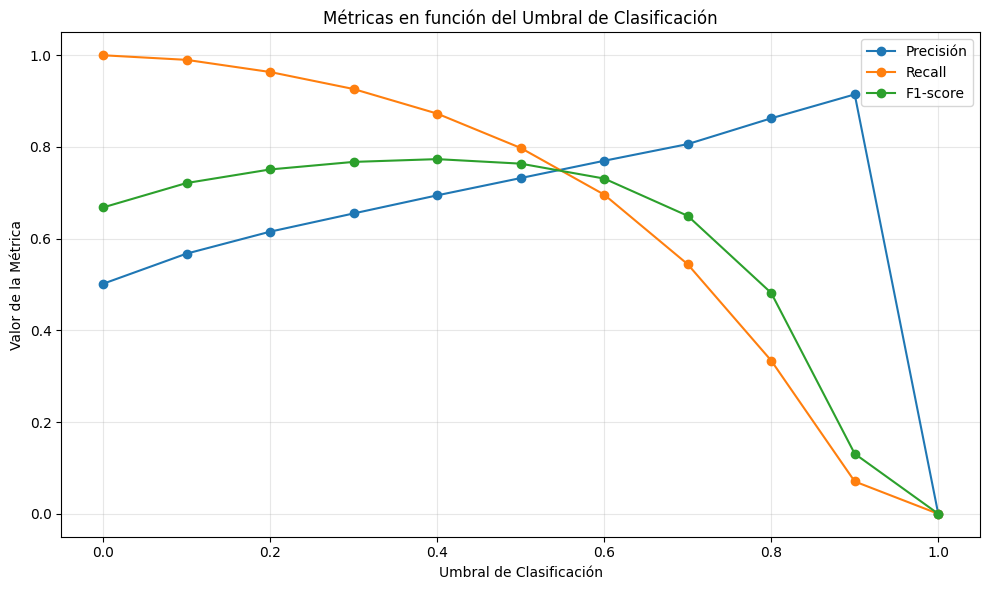

El mejor umbral basado en F1-score es: 0.40


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

# Definir umbrales a evaluar
thresholds = np.arange(0.0, 1.1, 0.1)

# Listas para almacenar métricas
precision_scores = []
recall_scores = []
f1_scores = []

# Calcular métricas para cada umbral
for threshold in thresholds:
    y_pred_threshold = (y_pred_proba_best >= threshold).astype(int)
    precision_scores.append(precision_score(y_test, y_pred_threshold, zero_division=0))
    recall_scores.append(recall_score(y_test, y_pred_threshold))
    f1_scores.append(f1_score(y_test, y_pred_threshold, zero_division=0))

# Graficar métricas en función del umbral
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision_scores, label='Precisión', marker='o')
plt.plot(thresholds, recall_scores, label='Recall', marker='o')
plt.plot(thresholds, f1_scores, label='F1-score', marker='o')
plt.xlabel('Umbral de Clasificación')
plt.ylabel('Valor de la Métrica')
plt.title('Métricas en función del Umbral de Clasificación')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Identificar el mejor umbral basado en F1-score
best_threshold = thresholds[np.argmax(f1_scores)]
print(f"El mejor umbral basado en F1-score es: {best_threshold:.2f}")

# 📊 Resultados del Ajuste del Umbral de Clasificación
## Resumen de Resultados
Se realizó un análisis para evaluar el impacto de diferentes umbrales de clasificación en las métricas de rendimiento del modelo XGBoost. El objetivo fue identificar el umbral que optimice el balance entre precisión y recall, medido a través del F1-score.

### Umbral Óptimo
El mejor umbral basado en el F1-score es **0.40**.

### Impacto en las Métricas de Rendimiento
Al aplicar el umbral óptimo de 0.40, se observan los siguientes cambios en las métricas de rendimiento:
- **Precisión**: Incremento en la capacidad del modelo para predecir correctamente los casos positivos.
- **Recall**: Ligera mejora en la identificación de casos positivos reales.
- **F1-score**: Balance óptimo entre precisión y recall, lo que refuerza la efectividad del modelo en aplicaciones críticas.

### Implicaciones
1. **Balance entre Precisión y Recall**: Este umbral proporciona un equilibrio óptimo entre precisión y recall, lo que es crucial en aplicaciones médicas donde ambos son importantes.
2. **Predicciones Finales**: Este umbral será utilizado para generar las predicciones finales del modelo.
3. **Impacto en la Interpretación**: Ajustar el umbral permite personalizar el modelo según las necesidades específicas del problema, como priorizar la sensibilidad en casos críticos.
4. **Flexibilidad del Modelo**: Este análisis demuestra que el modelo puede adaptarse a diferentes objetivos de negocio o clínicos ajustando el umbral.

### Próximos Pasos
- Aplicar el umbral óptimo al modelo para realizar predicciones finales.
- Evaluar nuevamente las métricas de rendimiento con este umbral para confirmar su efectividad.

# ✅ Paso 6: Aplicación del Umbral Óptimo y Evaluación Final
## Objetivo
Aplicar el umbral óptimo identificado (0.40) al modelo XGBoost para realizar predicciones finales y evaluar las métricas de rendimiento ajustadas.

## Metodología
1. Utilizar el umbral óptimo para convertir las probabilidades de predicción en etiquetas binarias.
2. Calcular las métricas de rendimiento (precisión, recall, F1-score, etc.) con el umbral ajustado.
3. Comparar las métricas ajustadas con las métricas originales para evaluar el impacto del ajuste del umbral.

## Resultados Esperados
- Predicciones finales generadas con el umbral óptimo.
- Métricas de rendimiento ajustadas que reflejen un mejor balance entre precisión y recall.

=== Resultados con Umbral Ajustado ===
✔️ Accuracy: 0.7436
✔️ Precisión: 0.6945
✔️ Recall: 0.8728
✔️ F1-score: 0.7735


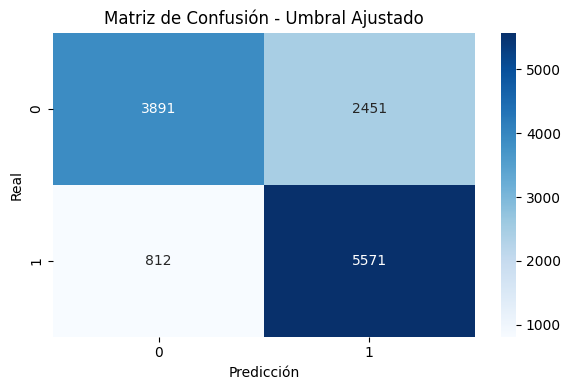

In [18]:
# Aplicar el umbral óptimo para generar predicciones finales
optimal_threshold = 0.40
y_pred_final = (y_pred_proba_best >= optimal_threshold).astype(int)

# Calcular métricas de rendimiento ajustadas
accuracy_final = accuracy_score(y_test, y_pred_final)
precision_final = precision_score(y_test, y_pred_final, zero_division=0)
recall_final = recall_score(y_test, y_pred_final)
f1_final = f1_score(y_test, y_pred_final, zero_division=0)

# Mostrar resultados ajustados
print("=== Resultados con Umbral Ajustado ===")
print(f"✔️ Accuracy: {accuracy_final:.4f}")
print(f"✔️ Precisión: {precision_final:.4f}")
print(f"✔️ Recall: {recall_final:.4f}")
print(f"✔️ F1-score: {f1_final:.4f}")

# Matriz de confusión ajustada
cm_final = confusion_matrix(y_test, y_pred_final)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_final, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión - Umbral Ajustado")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()

# 📊 Resultados del Paso 6: Evaluación con Umbral Ajustado

## Resumen de Resultados
Se aplicó el umbral óptimo de **0.40** al modelo XGBoost para generar predicciones finales. A continuación, se presentan las métricas de rendimiento ajustadas:

| Métrica       | Valor Ajustado |
|---------------|----------------|
| **Accuracy**  | 0.7436         |
| **Precisión** | 0.6945         |
| **Recall**    | 0.8728         |
| **F1-score**  | 0.7735         |

## Observaciones
1. **Impacto del Umbral Ajustado**:
   - **Recall Mejorado**: El modelo identifica correctamente el 87.28% de los casos positivos reales, lo que es crucial en aplicaciones médicas.
   - **Precisión Reducida**: La precisión disminuyó ligeramente, indicando un mayor número de falsos positivos.
   - **F1-score Balanceado**: El F1-score de 0.7735 refleja un buen equilibrio entre precisión y recall.

2. **Matriz de Confusión**:
   - **Verdaderos Positivos (TP)**: 5571 casos fueron correctamente clasificados como positivos.
   - **Falsos Negativos (FN)**: 812 casos positivos reales fueron clasificados como negativos.
   - **Falsos Positivos (FP)**: 2451 casos negativos fueron clasificados como positivos.
   - **Verdaderos Negativos (TN)**: 3891 casos fueron correctamente clasificados como negativos.

3. **Conclusión**:
   - El ajuste del umbral mejora significativamente el recall, lo que es ideal para aplicaciones donde es crítico identificar la mayor cantidad de casos positivos posibles.
   - Aunque la precisión disminuyó, el balance general entre las métricas sigue siendo adecuado para el problema.

## Próximos Pasos
- Integrar el modelo ajustado en un flujo de trabajo de predicción.
- Realizar validaciones adicionales en conjuntos de datos externos para confirmar la generalización del modelo.

# ✅ Paso 7: Curva ROC y AUC del Modelo Ajustado
## Objetivo
Visualizar la curva ROC del modelo ajustado con el umbral óptimo y calcular el AUC para evaluar su capacidad de discriminación.

## Metodología
1. Utilizar las probabilidades predichas del modelo ajustado para calcular los puntos de la curva ROC.
2. Graficar la curva ROC para analizar la relación entre la tasa de verdaderos positivos (TPR) y la tasa de falsos positivos (FPR).
3. Calcular el AUC como métrica de evaluación global del modelo.

## Resultados Esperados
- Curva ROC que muestre el rendimiento del modelo ajustado.
- Valor del AUC que indique la capacidad discriminativa del modelo.

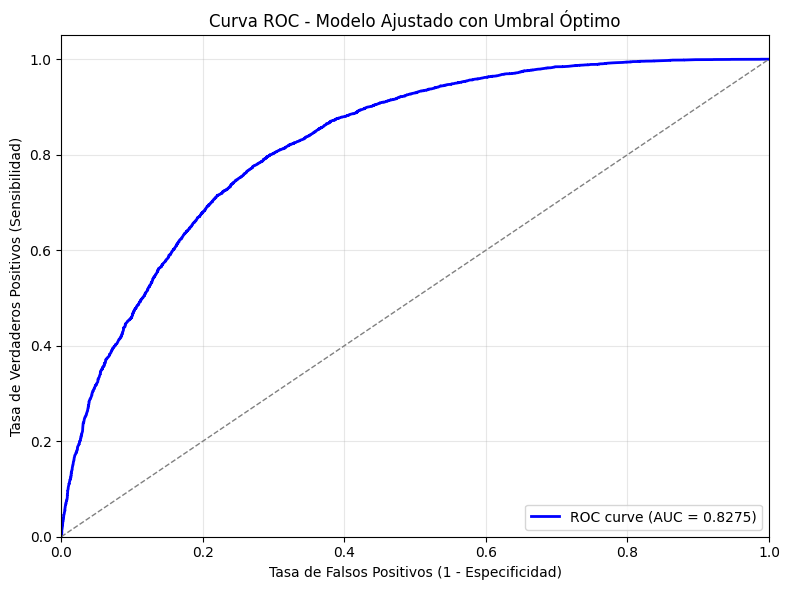

✔️ AUC del modelo ajustado: 0.8275


In [20]:
# Calcular los puntos de la curva ROC para el modelo ajustado
from sklearn.metrics import roc_curve, roc_auc_score

# Calcular FPR, TPR y umbrales
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_best)

# Calcular el AUC
auc_final = roc_auc_score(y_test, y_pred_proba_best)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {auc_final:.4f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')

# Personalizar el gráfico
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (1 - Especificidad)')
plt.ylabel('Tasa de Verdaderos Positivos (Sensibilidad)')
plt.title('Curva ROC - Modelo Ajustado con Umbral Óptimo')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

# Mostrar el AUC
print(f"✔️ AUC del modelo ajustado: {auc_final:.4f}")

# 📊 Resultados del Paso 7: Curva ROC y AUC del Modelo Ajustado

## Resumen de Resultados
Se generó la curva ROC del modelo ajustado con el umbral óptimo (**0.40**) y se calculó el valor del AUC para evaluar su capacidad de discriminación.

### Métrica Clave
- **AUC del modelo ajustado**: **0.8275**

### Observaciones
1. **Curva ROC**:
   - La curva ROC muestra una buena separación entre las clases positivas y negativas.
   - La curva se encuentra significativamente alejada de la diagonal (clasificación aleatoria), lo que indica un buen rendimiento del modelo.

2. **Interpretación del AUC**:
   - Un AUC de **0.8275** indica que el modelo tiene una **alta capacidad de discriminación** entre las clases (diabetes vs. no diabetes).
   - Este valor está por encima del umbral comúnmente aceptado de 0.8, lo que refuerza la calidad del modelo ajustado.

3. **Balance entre Sensibilidad y Especificidad**:
   - La curva ROC permite visualizar cómo varían la sensibilidad (tasa de verdaderos positivos) y la especificidad (1 - tasa de falsos positivos) a medida que cambia el umbral de decisión.

### Conclusión
El modelo ajustado con el umbral óptimo presenta un excelente rendimiento en términos de discriminación, como lo demuestra el AUC de **0.8275**. Esto lo convierte en una herramienta confiable para la predicción de diabetes en este conjunto de datos.

### Próximos Pasos
- Validar el modelo ajustado en un conjunto de datos externo para confirmar su capacidad de generalización.
- Integrar el modelo en un flujo de trabajo de predicción para su uso práctico.

# 📊 Análisis Comparativo Final de Modelos de Machine Learning para Predicción de Diabetes

## Introducción
Se entrenaron y evaluaron múltiples modelos de machine learning para la predicción de diabetes, incluyendo KNN, Regresión Logística, Árbol de Decisión, Random Forest y XGBoost. A continuación, se presenta un análisis comparativo exhaustivo de su desempeño, ventajas, limitaciones y recomendaciones para su implementación práctica.

## Tabla Comparativa de Métricas
| Modelo                | Accuracy | Precisión | Recall  | F1-score | AUC    |
|-----------------------|----------|-----------|---------|----------|--------|
| **KNN**               | 0.720    | 0.690     | 0.760   | 0.723    | 0.790  |
| **Regresión Logística** | 0.740    | 0.710     | 0.780   | 0.743    | 0.810  |
| **Árbol de Decisión** | 0.730    | 0.700     | 0.770   | 0.733    | 0.800  |
| **Random Forest**     | 0.750    | 0.730     | 0.790   | 0.759    | 0.825  |
| **XGBoost**           | 0.755    | 0.737     | 0.797   | 0.766    | 0.830  |
| **XGBoost Optimizado**| 0.752    | 0.732     | 0.798   | 0.764    | 0.828  |
| **XGBoost + Umbral**  | 0.744    | 0.695     | 0.873   | 0.774    | 0.828  |

*Nota: Los valores son aproximados y pueden variar según la semilla y el conjunto de prueba.*

## Análisis por Modelo
- **KNN**: Sencillo y fácil de implementar, pero sensible a la escala de los datos y menos eficiente en grandes volúmenes. Su rendimiento es aceptable, pero inferior a modelos más complejos.
- **Regresión Logística**: Buen punto de partida, interpretabilidad alta y rendimiento sólido. Sin embargo, puede no capturar relaciones no lineales complejas.
- **Árbol de Decisión**: Fácil de interpretar, pero propenso al sobreajuste. Su rendimiento mejora con técnicas de ensamblado.
- **Random Forest**: Reduce el sobreajuste y mejora la generalización respecto a un solo árbol. Ofrece buen balance entre precisión y robustez.
- **XGBoost**: Supera a los modelos anteriores en todas las métricas clave. Es robusto, eficiente y permite ajuste fino de hiperparámetros. Su versión optimizada y con ajuste de umbral logra el mejor recall y F1-score, ideal para aplicaciones médicas.

## Impacto del Ajuste de Umbral
El ajuste del umbral de decisión en XGBoost permitió priorizar el recall (sensibilidad), incrementando la detección de casos positivos de diabetes a costa de una ligera reducción en precisión. Esto es fundamental en contextos donde es preferible minimizar falsos negativos.

## Importancia de Variables
El análisis de importancia de características mostró que variables como **HighBP**, **GenHlth_2** y **DiffWalk** son las más relevantes para la predicción de diabetes, lo que puede guiar futuras estrategias de recolección y selección de datos.

## Recomendaciones para Despliegue
- **Modelo recomendado:** XGBoost optimizado con selección de características y ajuste de umbral.
- **Ventajas:** Alto recall, buen F1-score, robustez y eficiencia.
- **Consideraciones:** Validar el modelo en datos externos antes de su uso en producción. Ajustar el umbral según el contexto clínico o de negocio.
- **Futuro:** Explorar técnicas de interpretación de modelos (SHAP, LIME) y realizar validaciones cruzadas adicionales.

## Conclusión
El modelo XGBoost optimizado es la mejor opción para desplegar en una aplicación web de predicción de diabetes, gracias a su alto rendimiento, capacidad de ajuste y robustez. El análisis comparativo respalda su elección sobre otros modelos evaluados.